In [551]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler, RobustScaler, OrdinalEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score



In [552]:
data = pd.read_csv('2B.tsv', delimiter='\t')

In [553]:
data.head(10)

,Customer ID,Gender,Birth Date,Married,Dependents,Number of Dependents,Country,City,Number of Referrals,Tenure in Months,...,Avg Monthly GB Download,Premium Tech Support,Streaming Movies,Streaming Music,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Refunds,Satisfaction Score
0,8779-QRDMV,Male,1946/07/17,No,No,0,United States,Los Angeles,0,1,...,8,No,Yes,No,Month-to-Month,Yes,Bank Withdrawal,39.65,0.00,3
1,7495-OOKFY,Female,1950/11/12,Yes,Yes,1,United States,Los Angeles,1,8,...,17,No,No,No,Month-to-Month,Yes,Credit Card,80.65,0.00,3
2,1658-BYGOY,Male,1953/03/21,No,Yes,3,United States,Los Angeles,0,18,...,52,No,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,45.61,2
3,4598-XLKNJ,Female,1946/03/08,Yes,Yes,1,United States,Inglewood,1,25,...,12,No,Yes,No,Month-to-Month,Yes,Bank Withdrawal,98.50,13.43,2
4,4846-WHAFZ,Female,1944/04/02,Yes,Yes,1,United States,Whittier,1,37,...,14,No,No,No,Month-to-Month,Yes,Bank Withdrawal,76.50,0.00,2
5,4412-YLTKF,Female,1952/05/19,No,Yes,1,United States,Pico Rivera,0,27,...,18,No,No,No,Month-to-Month,Yes,Bank Withdrawal,78.05,0.00,1
6,0390-DCFDQ,Female,1948/03/07,Yes,Yes,2,United States,Los Alamitos,1,1,...,30,No,No,No,Month-to-Month,Yes,Mailed Check,70.45,0.00,2
7,3445-HXXGF,Male,1958/09/08,Yes,No,0,United States,Sierra Madre,6,58,...,24,No,Yes,No,Month-to-Month,Yes,Bank Withdrawal,45.30,40.95,1
8,2656-FMOKZ,Female,1954/01/07,No,Yes,2,United States,Pasadena,0,15,...,19,No,No,No,Month-to-Month,Yes,Mailed Check,74.45,0.00,2
9,2070-FNEXE,Female,1947/01/11,No,Yes,2,United States,Pasadena,0,7,...,18,No,No,No,Month-to-Month,No,Bank Withdrawal,76.45,11.05,2


# [LO 1,2,3 – 10 Points] Perform Exploratory Data Analysis (EDA) on the dataset. Identify the key findings and anomalies existing in the dataset. Make sure to handle the anomalies accordingly!

**Data Description**

In [554]:
data.describe()

,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Refunds,Satisfaction Score
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.468692,1.951867,32.386767,22.958954,20.515405,64.761692,1.962182,3.244924
std,0.962802,3.001199,24.542061,15.448113,20.418940,30.090047,7.902614,1.201657
min,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,0.000000,1.000000
25%,0.000000,0.000000,9.000000,9.210000,3.000000,35.500000,0.000000,3.000000
50%,0.000000,0.000000,29.000000,22.890000,17.000000,70.350000,0.000000,3.000000
75%,0.000000,3.000000,55.000000,36.395000,27.000000,89.850000,0.000000,4.000000
max,9.000000,11.000000,72.000000,49.990000,85.000000,118.750000,49.790000,5.000000


In [555]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Birth Date                         7043 non-null   object 
 3   Married                            7043 non-null   object 
 4   Dependents                         7043 non-null   object 
 5   Number of Dependents               7043 non-null   int64  
 6   Country                            7043 non-null   object 
 7   City                               7043 non-null   object 
 8   Number of Referrals                7043 non-null   int64  
 9   Tenure in Months                   7043 non-null   int64  
 10  Avg Monthly Long Distance Charges  7043 non-null   float64
 11  Internet Service                   7043 non-null   objec

In [556]:
# Drop unnecessary columns -> Customer ID
data = data[data.columns.drop('Customer ID')]

In [557]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Birth Date                         7043 non-null   object 
 2   Married                            7043 non-null   object 
 3   Dependents                         7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   Country                            7043 non-null   object 
 6   City                               7043 non-null   object 
 7   Number of Referrals                7043 non-null   int64  
 8   Tenure in Months                   7043 non-null   int64  
 9   Avg Monthly Long Distance Charges  7043 non-null   float64
 10  Internet Service                   7043 non-null   object 
 11  Internet Type                      5517 non-null   objec

In [558]:
# Splitting columns into categorical and numerical columns
cols = data.columns
num_cols = ['Number of Dependents', 'Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Refunds', 'Satisfaction Score']
cat_cols = ['Gender', 'Birth Date', 'Married', 'Dependents', 'Country', 'City', 'Internet Service', 'Internet Type', 'Premium Tech Support', 'Streaming Movies', 'Streaming Music', 'Contract', 'Paperless Billing', 'Payment Method']

**Handle Missing Value**

In [559]:
for col in cols :
  print(f'{col}\n{data[col].unique()}\n')

Gender
['Male' 'Female']

Birth Date
['1946/07/17' '1950/11/12' '1953/03/21' ... '1994/08/14' '1992/12/15'
 '1980/11/21']

Married
['No' 'Yes']

Dependents
['No' 'Yes']

Number of Dependents
[0 1 3 2 5 4 6 7 8 9]

Country
['United States']

City
['Los Angeles' 'Inglewood' 'Whittier' ... 'Topaz' 'Jacumba' 'Holtville']

Number of Referrals
[ 0  1  6  2  4  3  7  5  8  9 10 11]

Tenure in Months
[ 1  8 18 25 37 27 58 15  7 11  3 13 16 24  4 32 54  2 21 55  5 20 65 49
 43 56 52 33 30 46  9 10 35 44 62 14 12 17 39 68 34 22 19 23 42 41 57 38
 29 66 69 40 31 59 36 45 53 70 47 50 51 72 26  6 28 48 61 71 60 64 67 63]

Avg Monthly Long Distance Charges
[ 0.   48.85 11.33 ... 44.99 44.98  8.62]

Internet Service
['Yes' 'No']

Internet Type
['DSL' 'Fiber Optic' 'Cable' nan]

Avg Monthly GB Download
[ 8 17 52 12 14 18 30 24 19 29 28 11  9  7 15  2 10  5 13  0 27 26 22 25
 21 20  6 16 23  4  3 58 53 75 51 47 69 41 57 56 71 48 73 76 59 82 42 39
 85 46]

Premium Tech Support
['No' 'Yes']

Streaming Mo

In [560]:
for col in cols :
  print(f'{col}\n{data[col].value_counts()}\n')

Gender
Gender
Male      3555
Female    3488
Name: count, dtype: int64

Birth Date
Birth Date
2004/09/30    5
1973/06/07    5
1980/02/13    4
1966/06/22    4
1963/11/22    4
             ..
1999/10/14    1
1973/02/09    1
1981/04/01    1
1979/12/09    1
1980/11/21    1
Name: count, Length: 6002, dtype: int64

Married
Married
No     3641
Yes    3402
Name: count, dtype: int64

Dependents
Dependents
No     5416
Yes    1627
Name: count, dtype: int64

Number of Dependents
Number of Dependents
0    5416
1     553
2     531
3     517
5      10
4       9
6       3
7       2
8       1
9       1
Name: count, dtype: int64

Country
Country
United States    7043
Name: count, dtype: int64

City
City
Los Angeles         293
San Diego           285
San Jose            112
Sacramento          108
San Francisco       104
                   ... 
Jacumba               2
South Lake Tahoe      2
Johannesburg          2
Eldridge              2
Holtville             2
Name: count, Length: 1106, dtype: int64

N

In [561]:
# From above we can see that all of this data is from the same Country -> United States, so we can drop the column
data = data[data.columns.drop('Country')]
cat_cols.remove('Country')

In [562]:
# Make column Age
data['Birth Date'] = pd.to_datetime(data['Birth Date'])
data['Age'] = (pd.Timestamp.now() - data['Birth Date']).dt.days // 365

In [563]:
num_cols.append('Age')
data.head()

,Gender,Birth Date,Married,Dependents,Number of Dependents,City,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Internet Service,...,Premium Tech Support,Streaming Movies,Streaming Music,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Refunds,Satisfaction Score,Age
0,Male,1946-07-17,No,No,0,Los Angeles,0,1,0.00,Yes,...,No,Yes,No,Month-to-Month,Yes,Bank Withdrawal,39.65,0.00,3,78
1,Female,1950-11-12,Yes,Yes,1,Los Angeles,1,8,48.85,Yes,...,No,No,No,Month-to-Month,Yes,Credit Card,80.65,0.00,3,74
2,Male,1953-03-21,No,Yes,3,Los Angeles,0,18,11.33,Yes,...,No,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,45.61,2,71
3,Female,1946-03-08,Yes,Yes,1,Inglewood,1,25,19.76,Yes,...,No,Yes,No,Month-to-Month,Yes,Bank Withdrawal,98.50,13.43,2,78
4,Female,1944-04-02,Yes,Yes,1,Whittier,1,37,6.33,Yes,...,No,No,No,Month-to-Month,Yes,Bank Withdrawal,76.50,0.00,2,80


In [564]:
data.isnull().sum()

Gender                                  0
Birth Date                              0
Married                                 0
Dependents                              0
Number of Dependents                    0
City                                    0
Number of Referrals                     0
Tenure in Months                        0
Avg Monthly Long Distance Charges       0
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download                 0
Premium Tech Support                    0
Streaming Movies                        0
Streaming Music                         0
Contract                                0
Paperless Billing                       0
Payment Method                          0
Monthly Charge                          0
Total Refunds                           0
Satisfaction Score                      0
Age                                     0
dtype: int64

Because the number of missing value is quite big but not to big (roughly around 20ish% of the data), i will impute it with the mode

In [565]:
data['Internet Type'].fillna(data['Internet Type'].mode()[0], inplace=True)

In [566]:
data.isna().sum()

Gender                               0
Birth Date                           0
Married                              0
Dependents                           0
Number of Dependents                 0
City                                 0
Number of Referrals                  0
Tenure in Months                     0
Avg Monthly Long Distance Charges    0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Premium Tech Support                 0
Streaming Movies                     0
Streaming Music                      0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge                       0
Total Refunds                        0
Satisfaction Score                   0
Age                                  0
dtype: int64

**Handle Duplicate Data**

In [567]:
data.duplicated().sum()

0

**Handle Outlier**

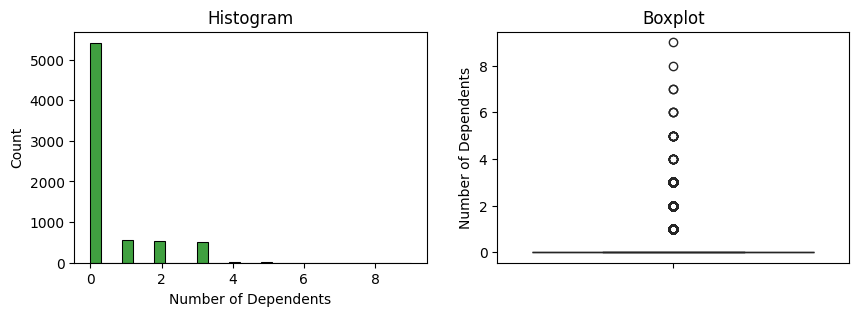

Skewness: 2.10993198077223
Kurtosis: 4.446357933815596


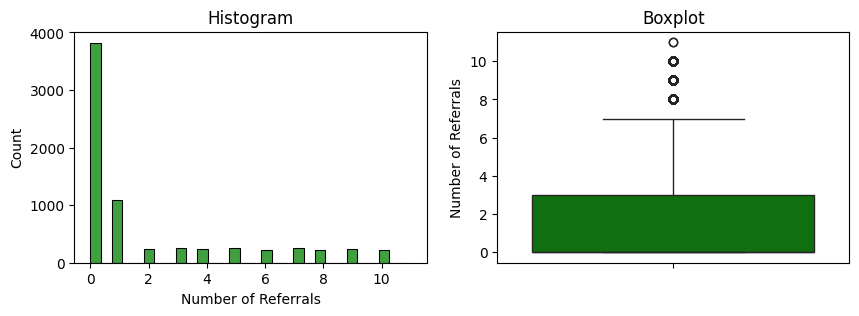

Skewness: 1.4460596247412694
Kurtosis: 0.721963934087432


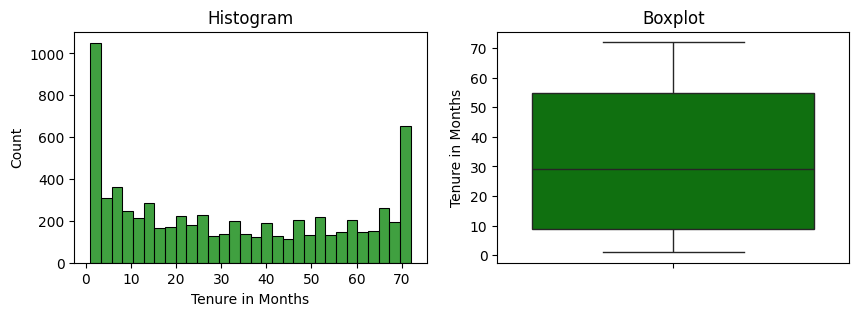

Skewness: 0.24054261407486294
Kurtosis: -1.3870523608481071


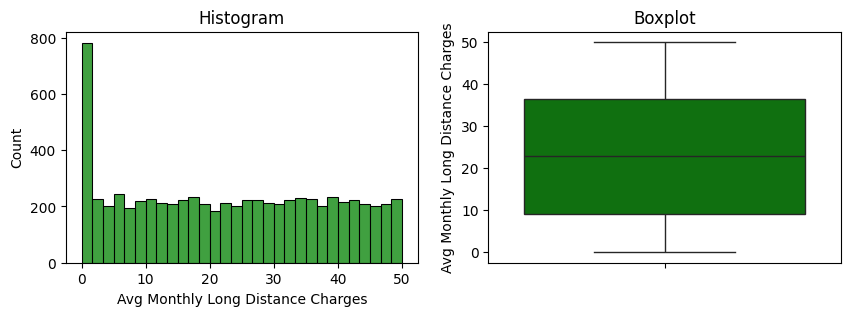

Skewness: 0.049175899338412654
Kurtosis: -1.2546544102968529


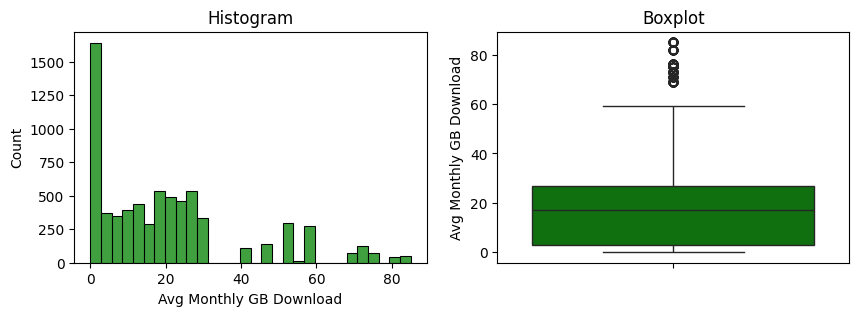

Skewness: 1.2165839031452528
Kurtosis: 0.8815023103111024


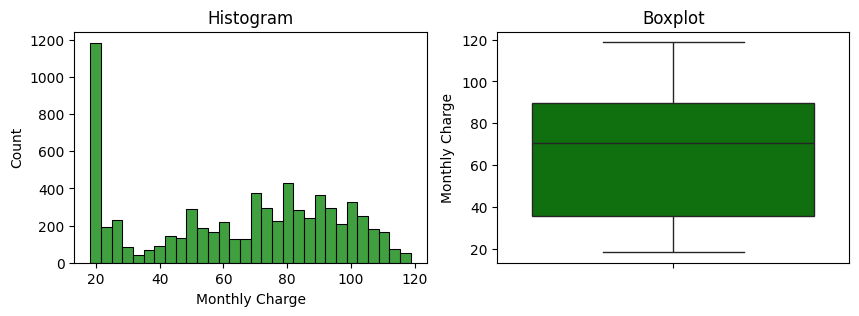

Skewness: -0.22052443394398033
Kurtosis: -1.2572596945495058


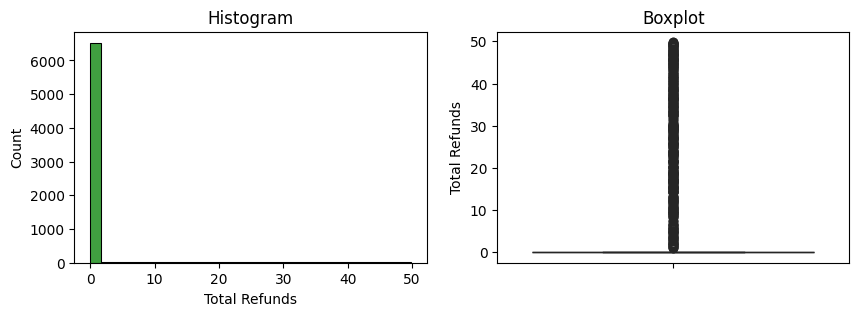

Skewness: 4.328516700962802
Kurtosis: 18.35065823613667


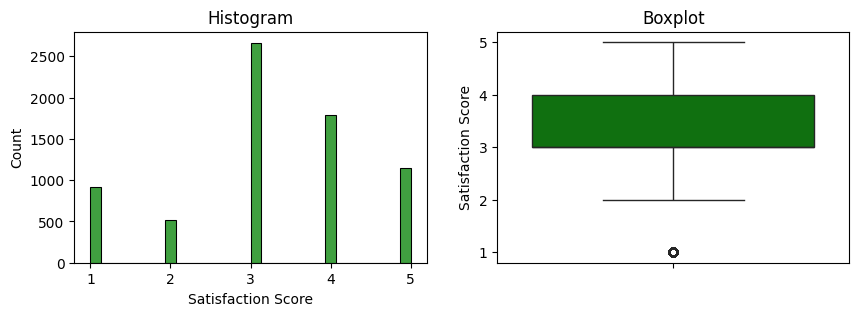

Skewness: -0.3674005424260873
Kurtosis: -0.5368532044523038


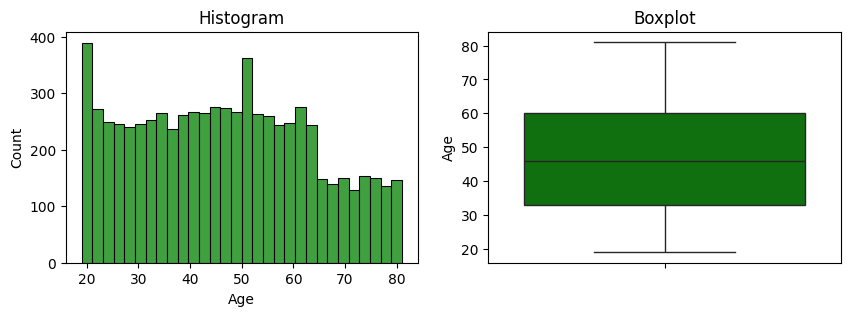

Skewness: 0.16121465057862883
Kurtosis: -1.0023996597663598


In [568]:
def check_dist(df, columns):
    for col in columns:
        plt.figure(figsize=(10, 3))

        plt.subplot(1, 2, 1)
        sns.histplot(df[col], bins=30, color='green')
        plt.title('Histogram')

        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[col], color = 'green')
        plt.title('Boxplot')

        plt.show()

        print('Skewness:', df[col].skew())
        print('Kurtosis:', df[col].kurt())

check_dist(data[num_cols], num_cols)

From the plots we can see that, **Age and Avg Monthly Long Distance Charges** have a **normal distribution**, whereas the rest is non normal distribution

# [LO 1,2,3 – 10 Points] Train a K-Means clustering model and fine-tune it using at least 2 metrics! Visualize the resulting clustered data!

**Encoding**

In [569]:
data = data.drop(columns=['Birth Date'])
cat_cols.remove('Birth Date')

In [570]:
data.head()

,Gender,Married,Dependents,Number of Dependents,City,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Internet Service,Internet Type,...,Premium Tech Support,Streaming Movies,Streaming Music,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Refunds,Satisfaction Score,Age
0,Male,No,No,0,Los Angeles,0,1,0.00,Yes,DSL,...,No,Yes,No,Month-to-Month,Yes,Bank Withdrawal,39.65,0.00,3,78
1,Female,Yes,Yes,1,Los Angeles,1,8,48.85,Yes,Fiber Optic,...,No,No,No,Month-to-Month,Yes,Credit Card,80.65,0.00,3,74
2,Male,No,Yes,3,Los Angeles,0,18,11.33,Yes,Fiber Optic,...,No,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,45.61,2,71
3,Female,Yes,Yes,1,Inglewood,1,25,19.76,Yes,Fiber Optic,...,No,Yes,No,Month-to-Month,Yes,Bank Withdrawal,98.50,13.43,2,78
4,Female,Yes,Yes,1,Whittier,1,37,6.33,Yes,Fiber Optic,...,No,No,No,Month-to-Month,Yes,Bank Withdrawal,76.50,0.00,2,80


In [571]:
for col in cat_cols :
  print(f'{col}\n{data[col].unique()}\n')

Gender
['Male' 'Female']

Married
['No' 'Yes']

Dependents
['No' 'Yes']

City
['Los Angeles' 'Inglewood' 'Whittier' ... 'Topaz' 'Jacumba' 'Holtville']

Internet Service
['Yes' 'No']

Internet Type
['DSL' 'Fiber Optic' 'Cable']

Premium Tech Support
['No' 'Yes']

Streaming Movies
['Yes' 'No']

Streaming Music
['No' 'Yes']

Contract
['Month-to-Month' 'One Year' 'Two Year']

Paperless Billing
['Yes' 'No']

Payment Method
['Bank Withdrawal' 'Credit Card' 'Mailed Check']



In [572]:
data['Gender'].replace({'Female': 0, 'Male': 1}, inplace = True)
data['Married'].replace({'No': 0, 'Yes': 1}, inplace = True)
data['Dependents'].replace({'No': 0, 'Yes': 1}, inplace = True)
data['Internet Service'].replace({'No': 0, 'Yes': 1}, inplace = True)
data['Premium Tech Support'].replace({'No': 0, 'Yes': 1}, inplace = True)
data['Streaming Movies'].replace({'No': 0, 'Yes': 1}, inplace = True)
data['Streaming Music'].replace({'No': 0, 'Yes': 1}, inplace = True)
data['Paperless Billing'].replace({'No': 0, 'Yes': 1}, inplace = True)
data['Internet Type'].replace({'DSL': 0, 'Fiber Optic': 1, 'Cable':2}, inplace = True)
data['Payment Method'].replace({'Bank Withdrawal': 0, 'Credit Card': 1, 'Mailed Check':2}, inplace = True)
data['Contract'].replace({'Month-to-Month': 0, 'One Year': 1, 'Two Year':2}, inplace = True)

In [573]:
onne = OneHotEncoder(sparse_output = False)
onnecol = ["City"]
onned = onne.fit_transform(data[onnecol])
onnedata = pd.DataFrame(onned, columns = onne.get_feature_names_out(onnecol))

dat = data.copy().reset_index(drop = True)
dat = pd.concat([dat.drop(columns = onnecol), onnedata.astype('int')], axis = 1)

In [574]:
for col in dat.columns:
  print(f'{col}\n{dat[col].unique()}\n')

Gender
[1 0]

Married
[0 1]

Dependents
[0 1]

Number of Dependents
[0 1 3 2 5 4 6 7 8 9]

Number of Referrals
[ 0  1  6  2  4  3  7  5  8  9 10 11]

Tenure in Months
[ 1  8 18 25 37 27 58 15  7 11  3 13 16 24  4 32 54  2 21 55  5 20 65 49
 43 56 52 33 30 46  9 10 35 44 62 14 12 17 39 68 34 22 19 23 42 41 57 38
 29 66 69 40 31 59 36 45 53 70 47 50 51 72 26  6 28 48 61 71 60 64 67 63]

Avg Monthly Long Distance Charges
[ 0.   48.85 11.33 ... 44.99 44.98  8.62]

Internet Service
[1 0]

Internet Type
[0 1 2]

Avg Monthly GB Download
[ 8 17 52 12 14 18 30 24 19 29 28 11  9  7 15  2 10  5 13  0 27 26 22 25
 21 20  6 16 23  4  3 58 53 75 51 47 69 41 57 56 71 48 73 76 59 82 42 39
 85 46]

Premium Tech Support
[0 1]

Streaming Movies
[1 0]

Streaming Music
[0 1]

Contract
[0 1 2]

Paperless Billing
[1 0]

Payment Method
[0 1 2]

Monthly Charge
[39.65 80.65 95.45 ... 43.05 72.   78.7 ]

Total Refunds
[ 0.   45.61 13.43 40.95 11.05 29.84 49.57 12.07 40.64 10.2  17.88 37.55
 48.09 32.46 20.23 12.

**Scaling**

In [575]:
rob = RobustScaler()
dat[num_cols] = rob.fit_transform(dat[num_cols])

In [576]:
dat

,Gender,Married,Dependents,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Internet Service,Internet Type,Avg Monthly GB Download,...,City_Wrightwood,City_Yermo,City_Yorba Linda,City_Yorkville,City_Yountville,City_Yreka,City_Yuba City,City_Yucaipa,City_Yucca Valley,City_Zenia
0,1,0,0,0.0,0.000000,-0.608696,-0.842008,1,0,-0.375000,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1.0,0.333333,-0.456522,0.954938,1,1,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,3.0,0.000000,-0.239130,-0.425235,1,1,1.458333,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,1.0,0.333333,-0.086957,-0.115137,1,1,-0.208333,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,1.0,0.333333,0.173913,-0.609159,1,1,-0.125000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0.0,0.000000,0.934783,-0.004414,0,1,-0.708333,...,0,0,0,0,0,0,0,0,0,0
7039,1,1,1,2.0,0.333333,-0.108696,0.484090,1,2,0.291667,...,0,0,0,0,0,0,0,0,0,0
7040,0,1,1,2.0,1.333333,0.934783,0.249034,1,1,1.750000,...,0,0,0,0,0,0,0,0,0,0
7041,0,1,1,2.0,0.333333,-0.391304,-0.842008,1,0,0.000000,...,0,0,0,0,0,0,0,0,0,0


**Dimentionality Reduction -> because the column is too many**

In [577]:
pca = PCA()
pca.fit(dat)

PCA()

Text(0, 0.5, 'Eigenvalues')

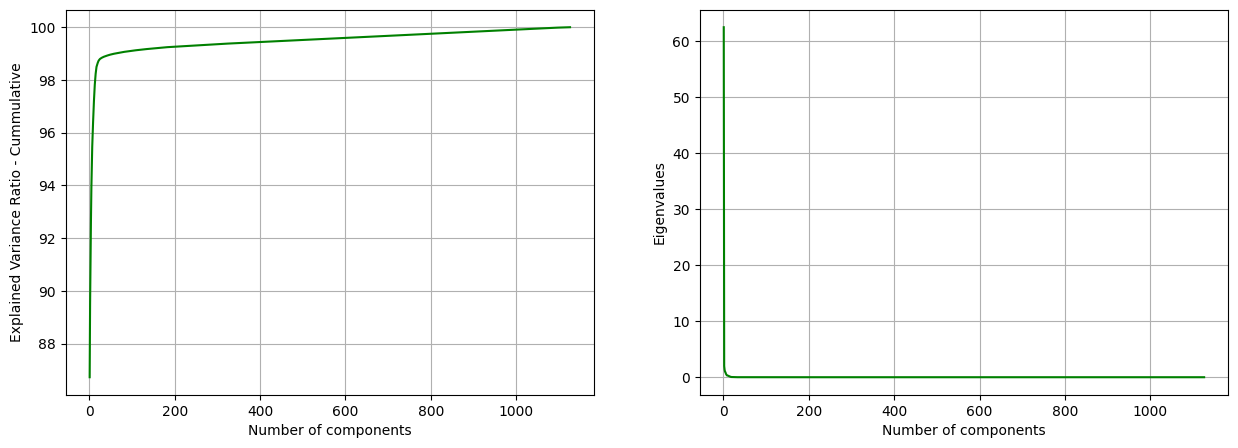

In [578]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, len(dat.columns)+1), np.cumsum(pca.explained_variance_ratio_ * 100), 'g-')
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, len(dat.columns)+1), pca.explained_variance_ , 'g-' )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

From the left graph we can see that the variance reach 100% at only around 5 features. And on the right graph we can see the elbow at around 2 - 5 features. Thats why i will take 5 number of components

In [579]:
pca2 = PCA(n_components=5)
reduced_data = pca2.fit_transform(dat)

In [580]:
reduced_data

array([[-1.97053332, -1.19394127,  0.84091197,  0.11440374, -0.17066295],
       [-1.96865305, -0.33230753, -0.05843618,  1.01474285,  0.09912416],
       [43.64242171, -1.06210408, -1.94168937,  1.60191447,  1.65835693],
       ...,
       [43.42983905,  1.32176324, -1.78821878, -0.09174462,  1.49030585],
       [25.27688146,  0.6047739 ,  0.19094752,  1.53609788,  1.39083884],
       [-1.94889252,  0.37347585,  0.28717114, -1.79619743, -0.14447783]])

**Find Optimal K**

In [581]:
# Fine tuning using silhoutte and distortions
distortions = []
silhouettes = []
k = range(2,10)
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=150)
    clusters = kmeans.fit_predict(reduced_data)
    silhouette_avg = silhouette_score(reduced_data, clusters)
    print(f'Number of cluster : {i} Avg Silhouette : {silhouette_avg}\n')
    distortions.append(kmeans.inertia_)
    silhouettes.append(silhouette_avg)

Number of cluster : 2 Avg Silhouette : 0.8805862894594394

Number of cluster : 3 Avg Silhouette : 0.832684128551006

Number of cluster : 4 Avg Silhouette : 0.25465037493338194

Number of cluster : 5 Avg Silhouette : 0.255232160647677

Number of cluster : 6 Avg Silhouette : 0.25363910049093263

Number of cluster : 7 Avg Silhouette : 0.2656296146198996

Number of cluster : 8 Avg Silhouette : 0.28641248111543094

Number of cluster : 9 Avg Silhouette : 0.2926563232847165



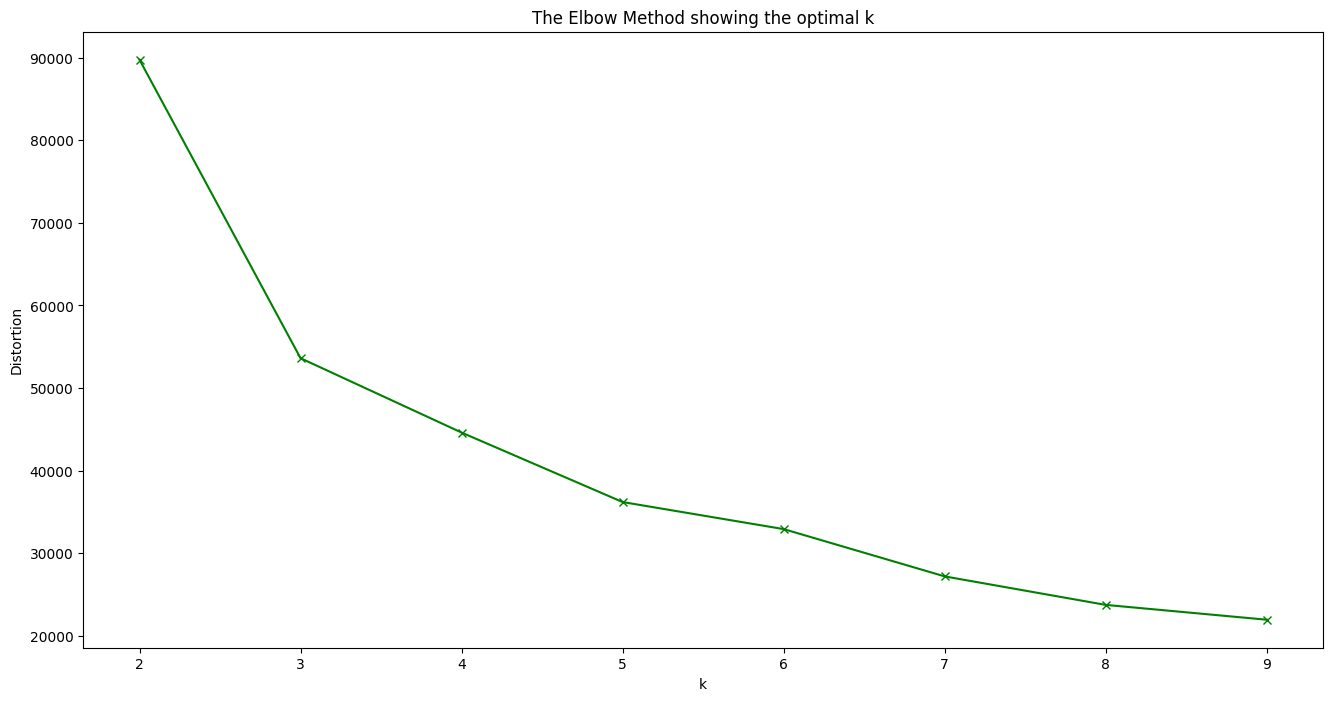

In [582]:
plt.figure(figsize=(16,8))
plt.plot(k, distortions, 'gx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

From the scores above, we can see cluster 2 has the highest Silhouette number at 88% meaning the clusters are not overlapped. Similarly, k = 3 also has quite high silhoutte score at 83%. Where the other (k = 4 etc) shows small silhouette number meaning that the clusters are overlapping. From the graph we can also see that the elbow shows up at around k = 3. So we can conclude that **the optimal k is 3**

**Clustering**

In [583]:
model = KMeans(n_clusters = 3, random_state = 150)
pred = model.fit_predict(reduced_data)
data_kmeans = dat.copy()
data_kmeans['Cluster']=pred
pred

array([0, 0, 1, ..., 1, 2, 0])

In [584]:
data_kmeans

,Gender,Married,Dependents,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Internet Service,Internet Type,Avg Monthly GB Download,...,City_Yermo,City_Yorba Linda,City_Yorkville,City_Yountville,City_Yreka,City_Yuba City,City_Yucaipa,City_Yucca Valley,City_Zenia,Cluster
0,1,0,0,0.0,0.000000,-0.608696,-0.842008,1,0,-0.375000,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1.0,0.333333,-0.456522,0.954938,1,1,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,3.0,0.000000,-0.239130,-0.425235,1,1,1.458333,...,0,0,0,0,0,0,0,0,0,1
3,0,1,1,1.0,0.333333,-0.086957,-0.115137,1,1,-0.208333,...,0,0,0,0,0,0,0,0,0,2
4,0,1,1,1.0,0.333333,0.173913,-0.609159,1,1,-0.125000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0.0,0.000000,0.934783,-0.004414,0,1,-0.708333,...,0,0,0,0,0,0,0,0,0,2
7039,1,1,1,2.0,0.333333,-0.108696,0.484090,1,2,0.291667,...,0,0,0,0,0,0,0,0,0,1
7040,0,1,1,2.0,1.333333,0.934783,0.249034,1,1,1.750000,...,0,0,0,0,0,0,0,0,0,1
7041,0,1,1,2.0,0.333333,-0.391304,-0.842008,1,0,0.000000,...,0,0,0,0,0,0,0,0,0,2


In [585]:
data_kmeans['Cluster'].unique()

array([0, 1, 2])

In [586]:
data_kmeans['Cluster'].value_counts()

Cluster
0    6604
2     233
1     206
Name: count, dtype: int64

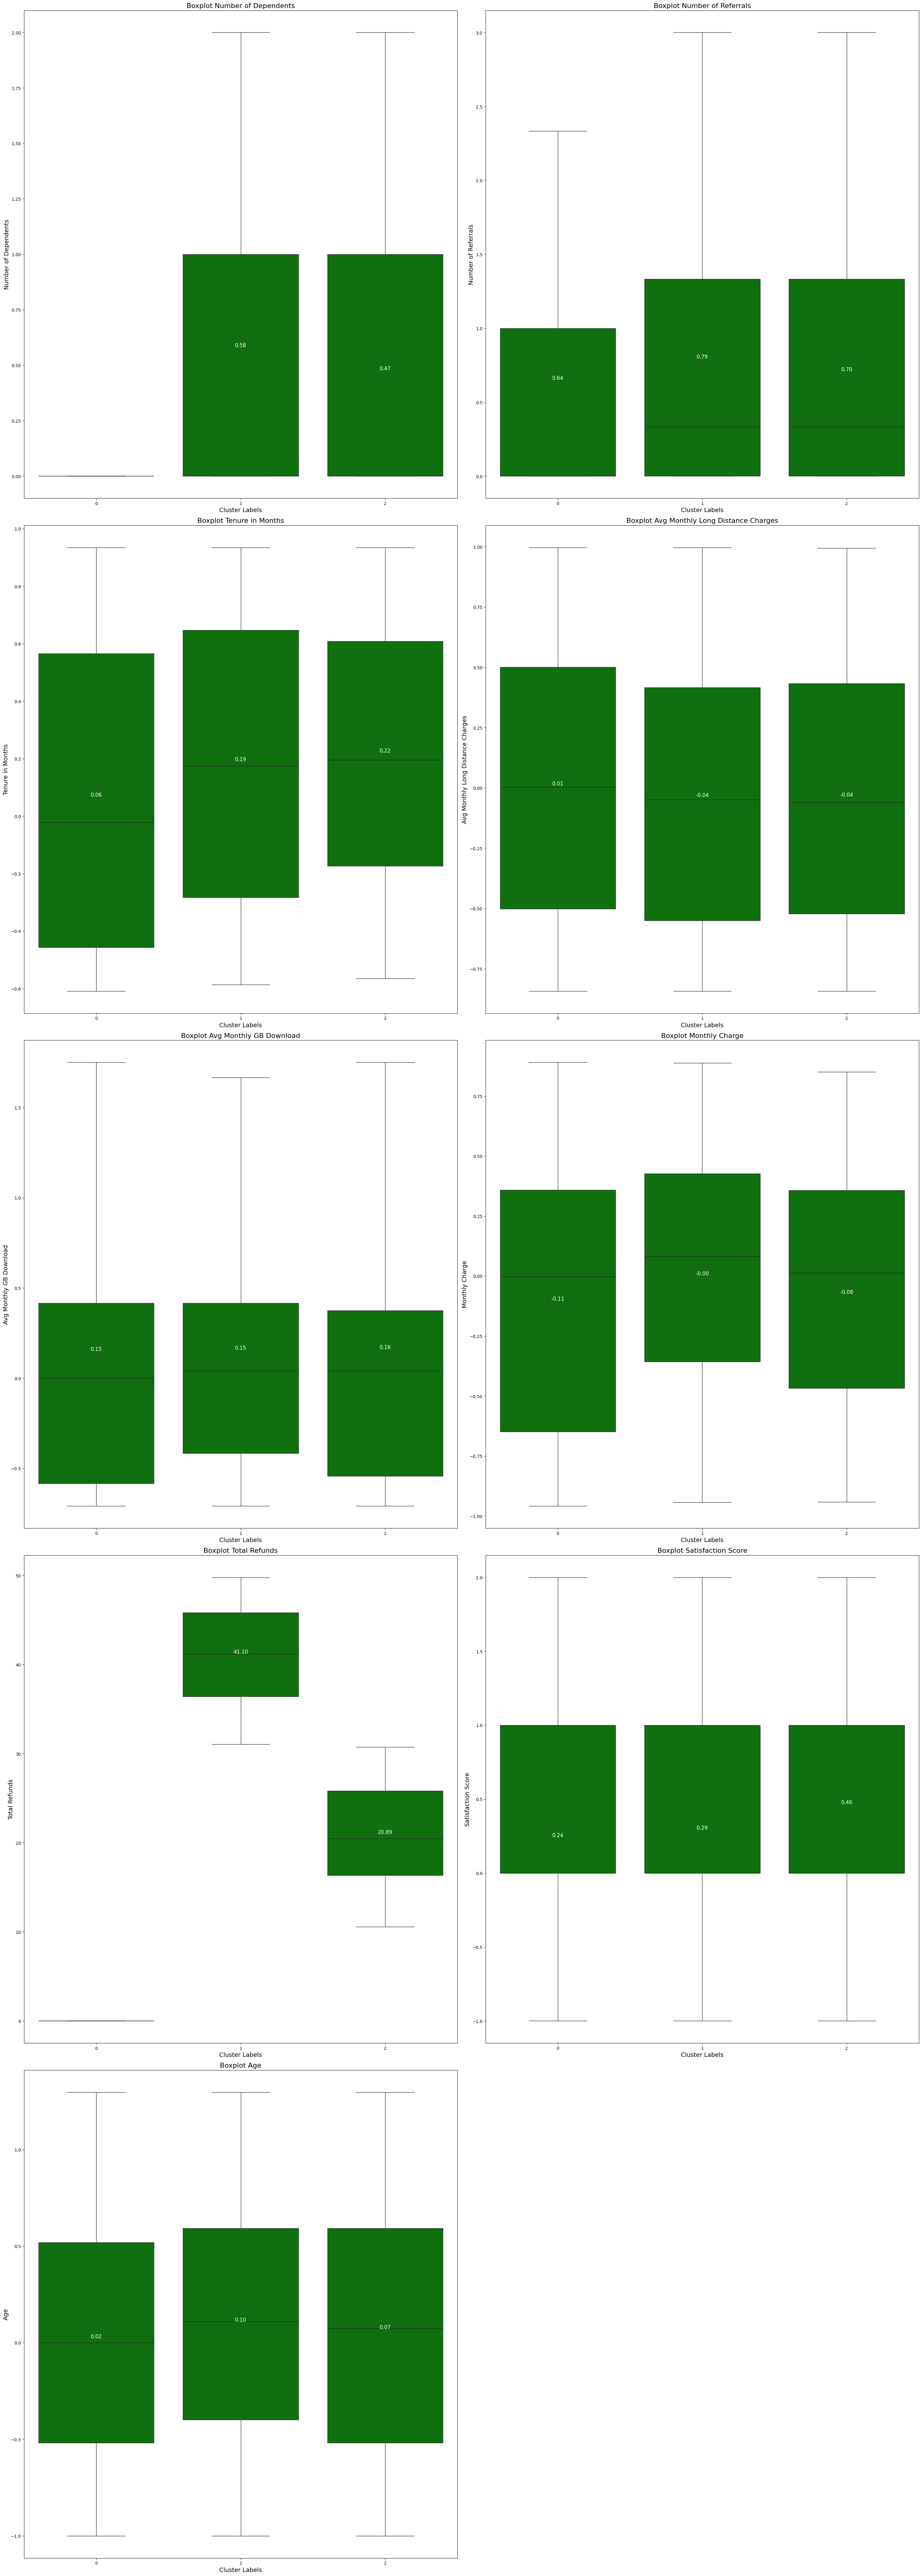

In [587]:
plt.figure(figsize=(30, 150))
for i, fitur in enumerate(num_cols, 1):
    plt.subplot(len(num_cols),2, i)
    sns.boxplot(x='Cluster', y=fitur, data=data_kmeans, showfliers=False, color = 'green')
    plt.xlabel('Cluster Labels', fontsize=14)
    plt.ylabel(fitur, fontsize=14)
    plt.title(f'Boxplot {fitur}', fontsize=16)
    
    # Menambahkan rata-rata ke dalam boxplot
    means = data_kmeans.groupby('Cluster')[fitur].mean().values
    for j, mean in enumerate(means):
        plt.text(j, mean, f'{mean:.2f}', ha='center', va='bottom', color='white', fontsize=12)

plt.tight_layout()
plt.show()

<Axes: >

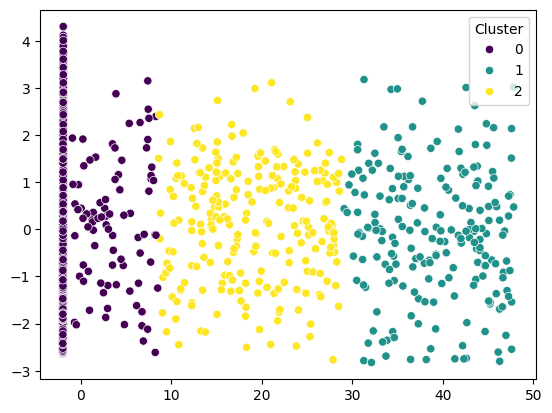

In [588]:
sns.scatterplot(x=reduced_data[:,0], y=reduced_data[:,1], hue=data_kmeans['Cluster'], palette='viridis')

# [LO 1,2,3,4 – 10 Points] Analyze the characteristics of each customer cluster!

From above, we can conclude that:
1. Cluster 1 are customers that dont have any number of dependents and smallest number of referrals which might mean that maybe their family is not on the using product from this company or they maybe not recommending this product(less-satisfied product) supported by the lowest average of the satisfactory score. Additionally because this cluster doenst have a high number in total refunds, this cluster of customer might be likely to churn
2. Cluster 2 are customers that spend a lot of money from this company(showed by the highest monthly charge) and also they are active customers showed by the high number of number of dependents and number of referrals. This cluster is quite satisfied with this companya showed by the second highest satisfactory score among the 3 of them, but they did complain things from this company showed by the high numer of total refunds
3. Cluster 3 are customers that are the most loyal and satisfied to this company showed by the highest number of satisfactory score and one of the lowest total refunds. And also they are active customers showed by the high number of number of dependents and number of referrals. Also this cluster might not complain as much as Cluster 2 showed by lower number of total refund than Cluster 2